In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Function for loading the desired image
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [4]:
# Function for displaying the image
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

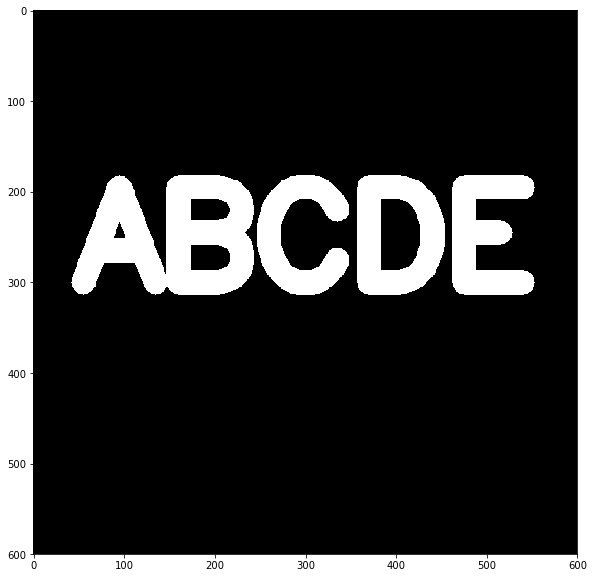

In [8]:
img=load_img()
display_img(img)

## Erosion
## Erodes away boundaries of foreground objects. 
## Works best when foreground is light color (preferrably white) and background is dark.

In [11]:
# Creating a kernel
kernel=np.ones((5,5),np.uint8)

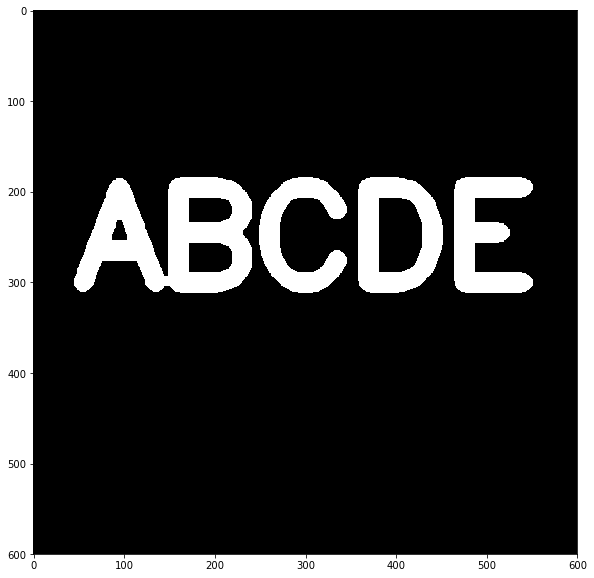

In [13]:
erosion1=cv2.erode(img,kernel,iterations=1)
display_img(erosion1)

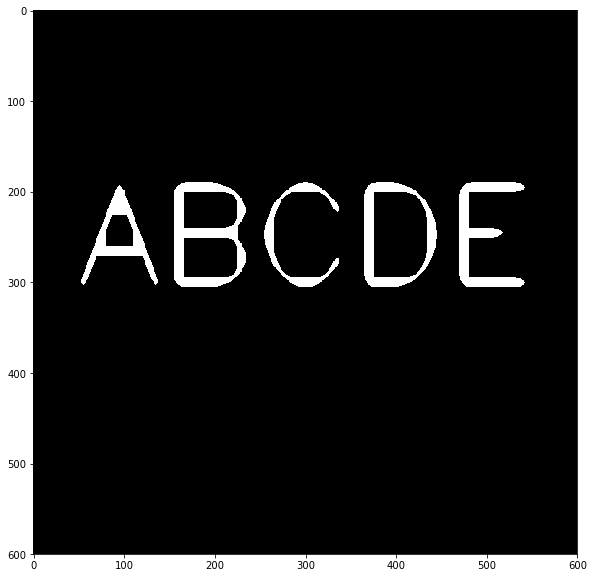

In [14]:
erosion1=cv2.erode(img,kernel,iterations=4)
display_img(erosion1)

# Opening
 Opening is erosion followed by dilation. Useful in removing background noise!

In [16]:
white_noise=np.random.randint(low=0,high=2,size=(600,600))

In [17]:
img=load_img()

In [18]:
img.shape


(600, 600)

In [20]:
white_noise.shape

(600, 600)

In [22]:
#255 makes the point fully white, so the numpy array will have random dots of white and black
white_noise=white_noise*255

In [23]:
white_noise

array([[255, 255, 255, ..., 255,   0, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255,   0, 255, ..., 255, 255,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ..., 255,   0, 255]])

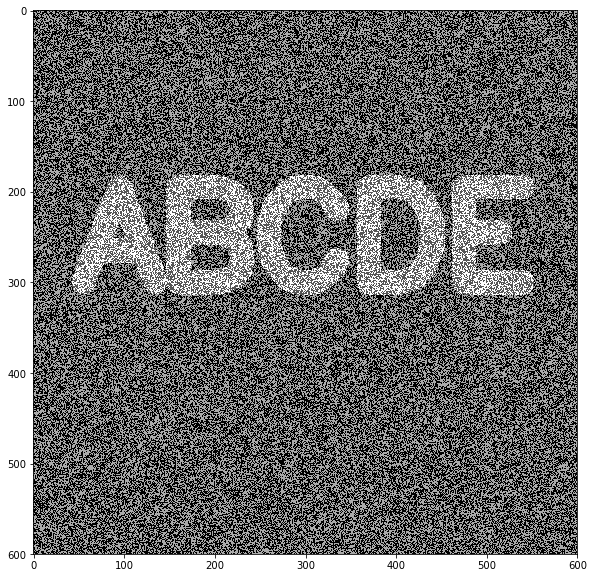

In [25]:
noise_img=img+white_noise
display_img(noise_img)

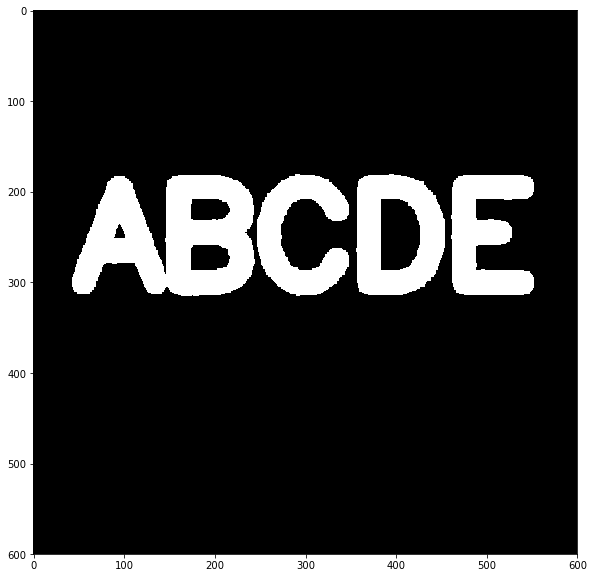

In [31]:
#Not how the noise has been reduced
#Morph open because we are removing background noise
opening =cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

# Closing
Useful in removing noise from foreground objects, such as black dots on top of the white text.
use MORPH_CLOSE as parameter to achieve that

# Morphological Gradient
Difference between dilation and erosion of an image
It is a type of edge detection

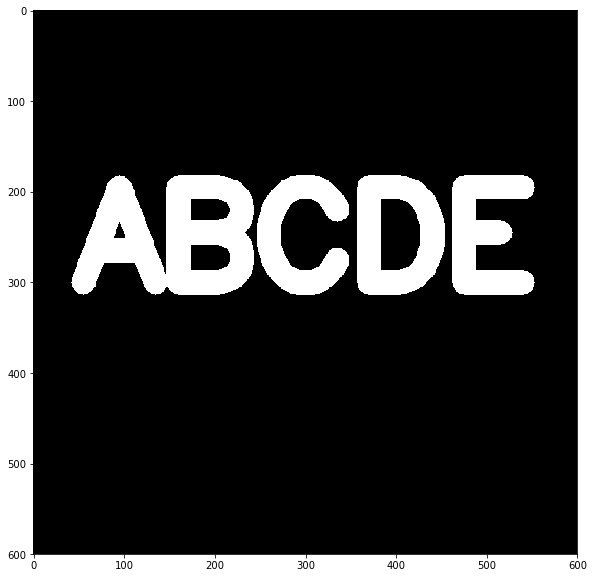

In [57]:
img=load_img()
display_img(img)

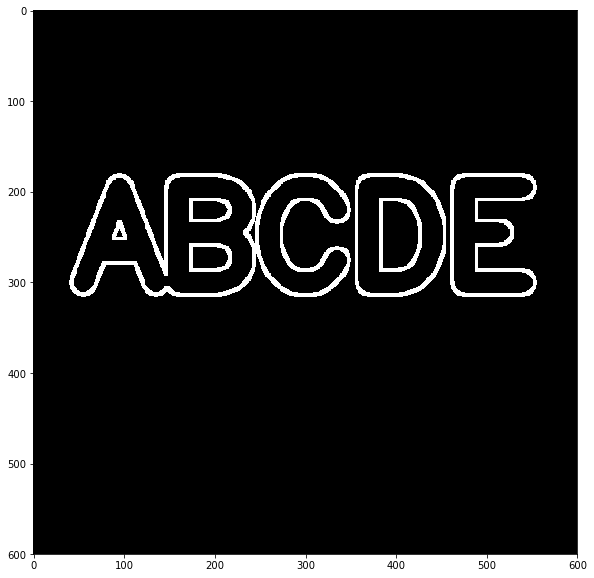

In [60]:
# Note how only the edges of the text are displayed
edge_img=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(edge_img)